# Evaluación 2

---



**Autor:** Diego Codina Pino

**Correo Electrónico:** Diego.codina2201@alumnos.ubiobio.cl

**Fecha de Creación:** 12 de Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 3 de la asignatura de Inteligencia Artificial de la Universidad del Bío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [105]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv

--2025-06-13 02:27:00--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_churn_2025.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402467 (393K) [text/plain]
Saving to: ‘dataset_churn_2025.csv.2’

dataset_churn_2025. 100%[===================>] 393.03K  --.-KB/s    in 0.02s   

2025-06-13 02:27:00 (20.2 MB/s) - ‘dataset_churn_2025.csv.2’ saved [402467/402467]



# Descripción de la data

+ `age` - Edad del cliente (18 a 75 años)
+ `months_active` - Meses de suscripción activa
+ `monthly_spend` - Gasto mensuales en dólares
+ `support_calls` - Número de llamadas al soporte
+ `contract_type` - Tipo de contrato: `mes_a_mes`, `1_ano`, `2_anos`
+ `has_discount` - Tiene descuento activo (1 = sí, 0 = no)
+ `churm` - Variable objetivo: 1 = abandonó, 0 = NO abandonó

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score,  classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline




In [107]:
data = pd.read_csv("dataset_churn_2025.csv")
data.head()

,age,months_active,monthly_spend,support_calls,contract_type,has_discount,churn
0,56,15,181.55,2,mes_a_mes,1,0
1,69,57,182.60,4,1_ano,0,0
2,46,58,109.54,1,1_ano,1,0
3,32,35,125.52,4,mes_a_mes,1,1
4,60,24,199.34,4,mes_a_mes,1,1


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15000 non-null  int64  
 1   months_active  15000 non-null  int64  
 2   monthly_spend  15000 non-null  float64
 3   support_calls  15000 non-null  int64  
 4   contract_type  15000 non-null  object 
 5   has_discount   15000 non-null  int64  
 6   churn          15000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 820.4+ KB


# Fase 4 - Modelamiento

## Modelo de clasificación

### Distribución de variable objetivo. (1 punto)

0    0
1    0
2    0
3    1
4    1
Name: churn, dtype: int64
churn
0    66.586667
1    33.413333
Name: proportion, dtype: float64


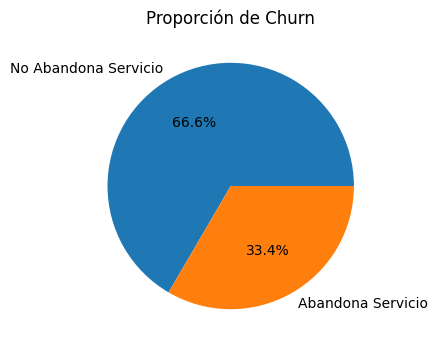

In [109]:
# Escriba su código acá
# Selección de variables independientes
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Crear copia de los datos para procesamiento
data_processed = data.copy()


y = data_processed['churn']
print(y.head())

distribucion_porcentaje = y.value_counts(normalize=True) * 100
print(distribucion_porcentaje)

#Grafico
plt.figure(figsize=(6, 4))
y.value_counts().plot.pie(autopct='%1.1f%%', labels=['No Abandona Servicio', 'Abandona Servicio'])
plt.title('Proporción de Churn')
plt.ylabel('')  # Elimina el label del eje Y
plt.show()


**Interpretación**

La distribucion muestra que el 33,4% de los clienetes ha abandona el servicio desde que existe la data.

### Selección de variables independientes (1 punto)

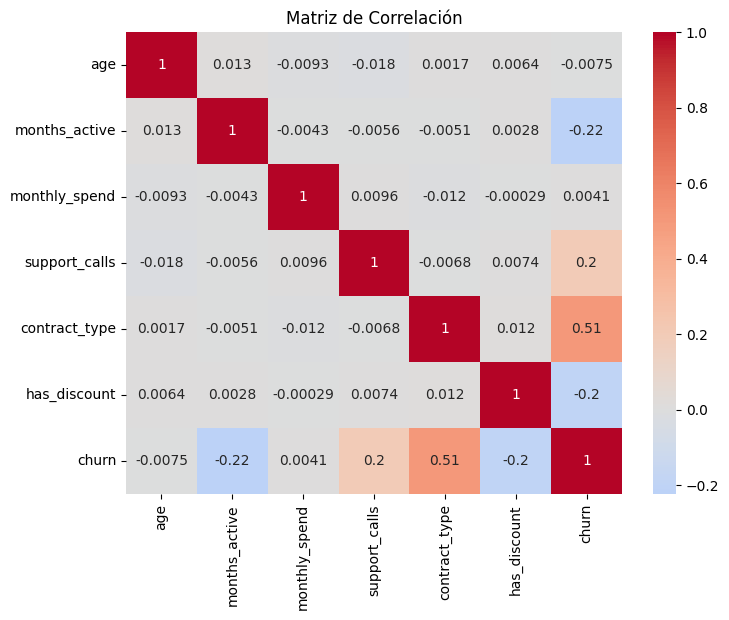

In [110]:
# Escriba su código acá
# Variables independientes: todas excepto 'churn' y 'contract_type' original
# Codificar la variable categórica 'contract_type'

import seaborn as sns

le = LabelEncoder()
data_processed['contract_type'] = le.fit_transform(data_processed['contract_type'])
# Crear un heatmap de la matriz de correlación
matriz_correlacion = data_processed.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

x = data_processed[[ 'months_active', 'support_calls',
                   'contract_type', 'has_discount']]


***Interpretación***
Las variables que seleccionadas para el modelo serán has_discount, months_active, support_calls y  contract_type. Dado que son las que más influyen en la variable objetivo (chum).

### Separación datos entrenamiento y test (1 punto)

In [111]:
# Escriba su código acá
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)




### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo (1 punto)

In [112]:
# Escriba su código acá


modelo_dtc = DecisionTreeClassifier(max_depth=3, criterion = "entropy", random_state=29)



#### Entrenamiento del modelo (1 punto)

In [113]:
# Escriba su código acá
modelo_dtc.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=29)

#### Evaluación del modelo

In [114]:
y_pred_dtc = modelo_dtc.predict(X_test)


#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

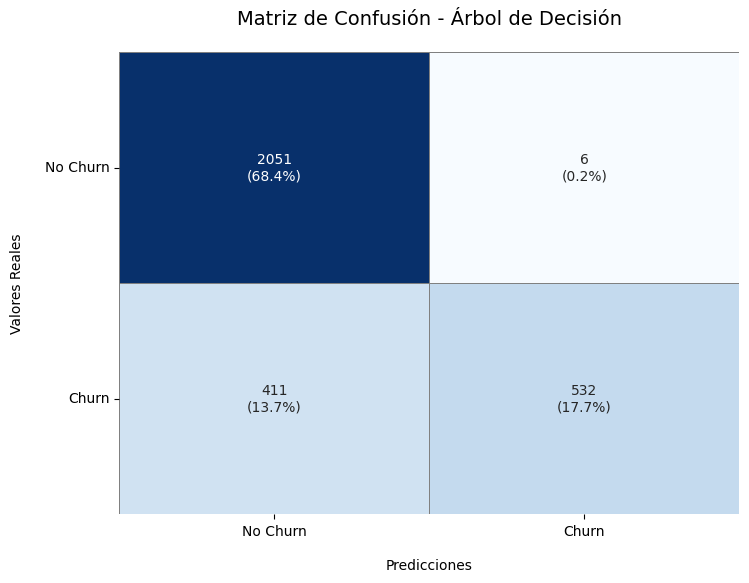

In [115]:
# Escriba su código acá

matriz_dtc = confusion_matrix(y_test, y_pred_dtc)
#print(matriz_dtc)


# Definir etiquetas
labels = ['No Churn', 'Churn']

# Calcular porcentajes
total = matriz_dtc.sum()
percentages = (matriz_dtc / total) * 100

# Crear anotaciones personalizadas (valor absoluto + porcentaje)
annotations = np.array([f"{value}\n({percent:.1f}%)"
                       for value, percent in zip(matriz_dtc.flatten(), percentages.flatten())]).reshape(matriz_dtc.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_dtc, annot=annotations, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - Árbol de Decisión', pad=20, fontsize=14)
plt.xlabel('Predicciones', labelpad=15)
plt.ylabel('Valores Reales', labelpad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

##### Accuracy (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [116]:
# Evaluación del modelo Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
f1_score_dtc = f1_score(y_test, y_pred_dtc)
recall_score_dtc = recall_score(y_test, y_pred_dtc)
precision_score_dtc = precision_score(y_test, y_pred_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_pred_dtc)


# Mostrar métricas de forma organizada
print("\n=== Métricas de Evaluación ===")
print(f"• Precisión (Accuracy): {accuracy_dtc:.4f}")
print(f"• F1-Score: {f1_score_dtc:.4f}")
print(f"• Recall (Sensibilidad): {recall_score_dtc:.4f}")
print(f"• Precisión: {precision_score_dtc:.4f}")




=== Métricas de Evaluación ===
• Precisión (Accuracy): 0.8610
• F1-Score: 0.7184
• Recall (Sensibilidad): 0.5642
• Precisión: 0.9888


Accuracy: 86.1%.

Verdaderos Negativos: 2051 (68.4%) – Correctamente identificados como "No Churn".

Falsos Positivos: 6 (0.2%) – Clientes predichos como "Churn" que no abandonaron.

Falsos Negativos: 411 (13.7%) – Clientes que se fueron ("Churn real") pero no fueron detectados.

Verdaderos Positivos: 532 (17.7%) – Correctamente clasificados como "Churn".

Precisión (98.88%) muy alta: Cuando predice "Churn", casi siempre acierta (solo 0.2% de falsos positivos).

Recall bajo (56.42%): Detecta solo el 56.4% de los casos reales de Churn, dejando pasar muchos falsos negativos (13.7% del total).

F1-Score (71.84%): Refleja el equilibrio entre precisión y recall, confirmando que el modelo es bueno evitando falsas alarmas, pero falla en identificar muchos abandonos reales.

AUC-ROC (78.06%): El modelo tiene un 78.06% de probabilidad de distinguir (CLASIFICAR) correctamente entre un cliente que abandona y uno que se queda.



### Algoritmo 2 - Naive Bayes

#### Creación del modelo - (1 punto)

In [117]:
# Escriba su código acá
from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()


#### Entrenamiento del modelo - (1 punto)

In [118]:
# Escriba su código acá
modelo_nb.fit(X_train, y_train)


GaussianNB()

#### Evaluación del modelo - (1 punto)

In [119]:
y_pred_nb = modelo_nb.predict(X_test)


#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

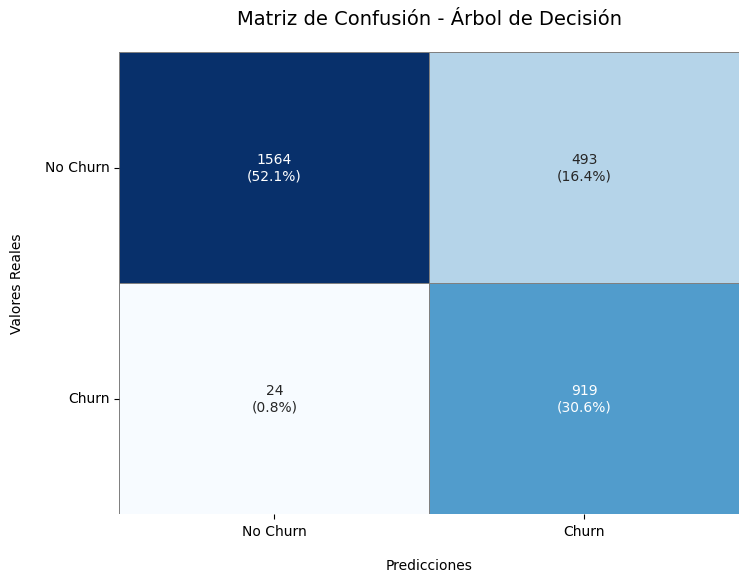

In [120]:
# Escriba su código acá
matriz_nb = confusion_matrix(y_test, y_pred_nb)

#print(matriz_dtc)


# Definir etiquetas
labels = ['No Churn', 'Churn']

# Calcular porcentajes
total = matriz_nb.sum()
percentages = (matriz_nb / total) * 100

# Crear anotaciones personalizadas (valor absoluto + porcentaje)
annotations = np.array([f"{value}\n({percent:.1f}%)"
                       for value, percent in zip(matriz_nb.flatten(), percentages.flatten())]).reshape(matriz_nb.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_nb, annot=annotations, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - Árbol de Decisión', pad=20, fontsize=14)
plt.xlabel('Predicciones', labelpad=15)
plt.ylabel('Valores Reales', labelpad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [121]:
# Evaluación del modelo Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)
recall_score_nb = recall_score(y_test, y_pred_nb)
precision_score_nb = precision_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)


# Mostrar métricas de forma organizada
print("\n=== Métricas de Evaluación (Naive Bayes) ===")
print(f"• Precisión (Accuracy): {accuracy_nb:.4f}")
print(f"• F1-Score: {f1_score_nb:.4f}")
print(f"• Recall (Sensibilidad): {recall_score_nb:.4f}")
print(f"• Precisión: {precision_score_nb:.4f}")



=== Métricas de Evaluación (Naive Bayes) ===
• Precisión (Accuracy): 0.8277
• F1-Score: 0.7805
• Recall (Sensibilidad): 0.9745
• Precisión: 0.6508


Accuracy: 82.77% .
Verdaderos Negativos: 1564 (52.1%) – Correctamente identificados como "No Churn".

Falsos Positivos: 493 (16.4%) – Clientes predichos como "Churn" que no abandonaron.

Falsos Negativos: 24 (0.8%) – Clientes que se fueron ("Churn real") pero no fueron detectados.

Verdaderos Positivos: 919 (30.6%) – Correctamente clasificados como "Churn".


Recall/Sensibilidad (97.45%): Excelente detección de Churn real (solo 0.8% de falsos negativos). Esto significa que el modelo capta casi todos los clientes que realmente abandonarían, lo cual es crítico en problemas de retención.

Precisión (65.08%): Relativamente baja. Aunque el modelo marca correctamente el 30.6% de Verdaderos Positivos, también genera un 16.4% de falsos positivos (clientes incorrectamente identificados como "Churn"). Esto implica posibles costos adicionales en campañas de retención para clientes que no iban a irse.

F1-Score (78.05%): Refleja un buen equilibrio entre precisión y recall, pero con mayor peso hacia el recall (dado su valor alto).

AUC-ROC (86.74%): El modelo tiene un 86.74% de probabilidad de distinguir  (CLASIFICAR) correctamente entre un cliente que abandona y uno que se queda.

En problemas de churn, los falsos negativos (no detectar clientes que realmente van a abandonar) suelen ser más costosos que los falsos positivos lo cual es positivo en este contexto.


### Algoritmo 3 - Regresión Logística

#### Creación del modelo - (1 punto)

In [122]:
# Escriba su código acá
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()

#### Entrenamiento del modelo - (1 punto)

In [123]:
# Escriba su código acá
modelo_lr.fit(X_train, y_train)



LogisticRegression()

#### Evaluación del modelo - (1 punto)

In [124]:
y_pred_lr = modelo_lr.predict(X_test)


#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

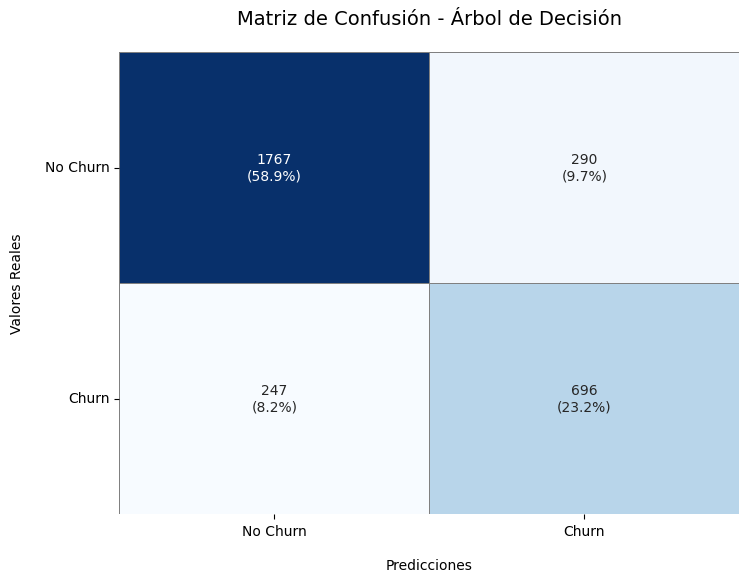

In [125]:
# Escriba su código acá

matriz_lr = confusion_matrix(y_test, y_pred_lr)

#print(matriz_dtc)


# Definir etiquetas
labels = ['No Churn', 'Churn']

# Calcular porcentajes
total = matriz_lr.sum()
percentages = (matriz_lr / total) * 100

# Crear anotaciones personalizadas (valor absoluto + porcentaje)
annotations = np.array([f"{value}\n({percent:.1f}%)"
                       for value, percent in zip(matriz_lr.flatten(), percentages.flatten())]).reshape(matriz_lr.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_lr, annot=annotations, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - Árbol de Decisión', pad=20, fontsize=14)
plt.xlabel('Predicciones', labelpad=15)
plt.ylabel('Valores Reales', labelpad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [126]:
# Evaluación del modelo Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
recall_score_lr = recall_score(y_test, y_pred_lr)
precision_score_lr = precision_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

# Mostrar métricas de forma organizada
print("\n=== Métricas de Evaluación (Regresión Logística) ===")
print(f"• Precisión (Accuracy): {accuracy_lr:.4f}")
print(f"• F1-Score: {f1_score_lr:.4f}")
print(f"• Recall (Sensibilidad): {recall_score_lr:.4f}")
print(f"• Precisión: {precision_score_lr:.4f}")
print(f"• AUC-ROC: {roc_auc_lr:.4f}\n")


=== Métricas de Evaluación (Regresión Logística) ===
• Precisión (Accuracy): 0.8210
• F1-Score: 0.7216
• Recall (Sensibilidad): 0.7381
• Precisión: 0.7059
• AUC-ROC: 0.7985



El modelo tiene un 82.1% de precisión global.


Verdaderos Negativos (TN): 1767 (58.9%) – Correctamente identificados como "No Churn".

Falsos Positivos (FP): 290 (9.7%) – Clientes predichos como "Churn" que en realidad no abandonaron.

Falsos Negativos (FN): 247 (8.2%) – Clientes que sí se fueron ("Churn real") pero el modelo no detectó.

Verdaderos Positivos (TP): 696 (23.2%) – Correctamente clasificados como "Churn".

Accuracy (82.10%): El modelo acierta en el 82.1% de las predicciones, mostrando un buen rendimiento general.

Recall/Sensibilidad (73.81%): Detecta el 73.8% del Churn real, dejando escapar un 8.2% de falsos negativos. Esto significa que 1 de cada 5 clientes que abandonarían no son detectados.

Precisión (70.59%): Cuando predice "Churn", acierta 70.6% de las veces. El 9.7% de falsos positivos implica que algunas campañas de retención podrían dirigirse a clientes que no tenían riesgo real.

F1-Score (72.16%): Refleja un balance decente entre precisión y recall, aunque con margen de mejora.

AUC-ROC (79.95%): El modelo tiene un 79.85% de probabilidad de distinguir (CLASIFICAR) correctamente entre un cliente que abandona y uno que se queda.

### Algoritmo 4 - RandomForest

#### Creación del modelo - (1 punto)

In [127]:
# Escriba su código acá
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#### Entrenamiento del modelo - (1 punto)

In [128]:
# Escriba su código acá
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Evaluación del modelo - (1 punto)

In [129]:
# Escriba su código acá
y_pred_rf = modelo_rf.predict(X_test)


#### Cálculo e interpretación de métricas

##### Matriz de confusión - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

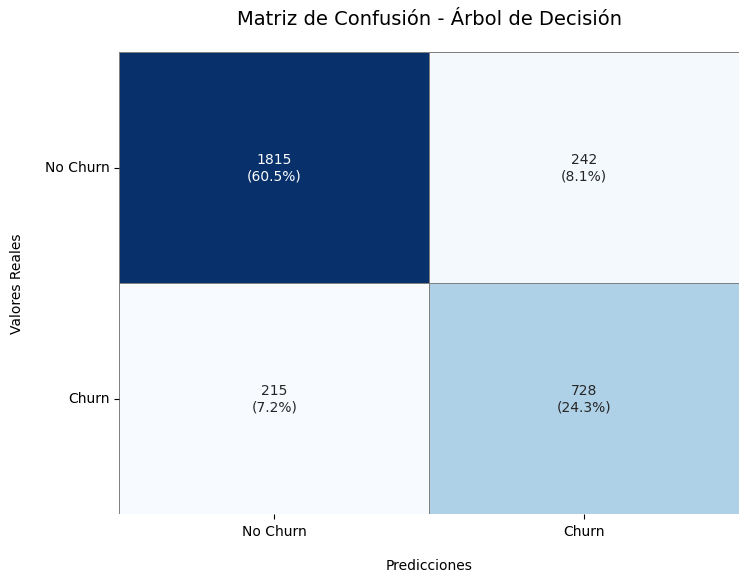

In [130]:
# Escriba su código acá
# Escriba su código acá
# Escriba su código acá
matriz_rfc = confusion_matrix(y_test, y_pred_rf)

#print(matriz_dtc)


# Definir etiquetas
labels = ['No Churn', 'Churn']

# Calcular porcentajes
total = matriz_rfc.sum()
percentages = (matriz_rfc / total) * 100

# Crear anotaciones personalizadas (valor absoluto + porcentaje)
annotations = np.array([f"{value}\n({percent:.1f}%)"
                       for value, percent in zip(matriz_rfc.flatten(), percentages.flatten())]).reshape(matriz_rfc.shape)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_rfc, annot=annotations, fmt='', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Matriz de Confusión - Árbol de Decisión', pad=20, fontsize=14)
plt.xlabel('Predicciones', labelpad=15)
plt.ylabel('Valores Reales', labelpad=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

##### Accuracy - (2 puntos)

0.5 puntos por cálculo + 1.5 puntos por interpretación correcta

In [131]:
# Evaluación del modelo Random Forest
accuracy_rfc = accuracy_score(y_test, y_pred_rf)
f1_score_rfc = f1_score(y_test, y_pred_rf)
recall_score_rfc = recall_score(y_test, y_pred_rf)
precision_score_rfc = precision_score(y_test, y_pred_rf)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rf)

# Mostrar métricas de forma organizada
print("\n=== Métricas de Evaluación ===")
print(f"• Precisión (Accuracy): {accuracy_rfc:.4f}")
print(f"• F1-Score: {f1_score_rfc:.4f}")
print(f"• Recall (Sensibilidad): {recall_score_rfc:.4f}")
print(f"• Precisión: {precision_score_rfc:.4f}")
print(f"• AUC-ROC: {roc_auc_rfc:.4f}\n")


=== Métricas de Evaluación ===
• Precisión (Accuracy): 0.8477
• F1-Score: 0.7611
• Recall (Sensibilidad): 0.7720
• Precisión: 0.7505
• AUC-ROC: 0.8272



Accuracy: 84.77% (0.8477)

Verdaderos Negativos: 1815 (60.5%) – Correctamente identificados como "No Churn".

Falsos Positivos: 242 (8.1%) – Clientes predichos como "Churn" que en realidad no abandonaron.

Falsos Negativos: 215 (7.2%) – Clientes que sí se fueron ("Churn real") pero el modelo no detectó.

Verdaderos Positivos: 728 (24.3%) – Correctamente clasificados como "Churn".


Recall/Sensibilidad (77.20%): Detecta el 77.2% de los casos reales de abandono.

Precisión (75.05%): De todos los clientes marcados como "en riesgo", el 75.05% realmente abandonaría.

F1-Score (76.11%): Muestra un buen equilibrio entre Recall y Precisión.


AUC-ROC (82.72%): El modelo tiene un 78.06% de probabilidad de distinguir (CLASIFICAR) correctamente entre un cliente que abandona y uno que se queda.



### Comparación de los modelos - (2 puntos)


=== Tabla Comparativa de Modelos ===
                Modelo  Accuracy  Recall  Precisión  F1-Score  AUC-ROC
0  Regresión Logística    0.8210  0.7381     0.7059    0.7216   0.7985
1          Naive Bayes    0.8277  0.9745     0.6508    0.7805   0.8674
2        Decision Tree    0.8610  0.5642     0.9888    0.7184   0.7806
3        Random Forest    0.8477  0.7720     0.7505    0.7611   0.8272


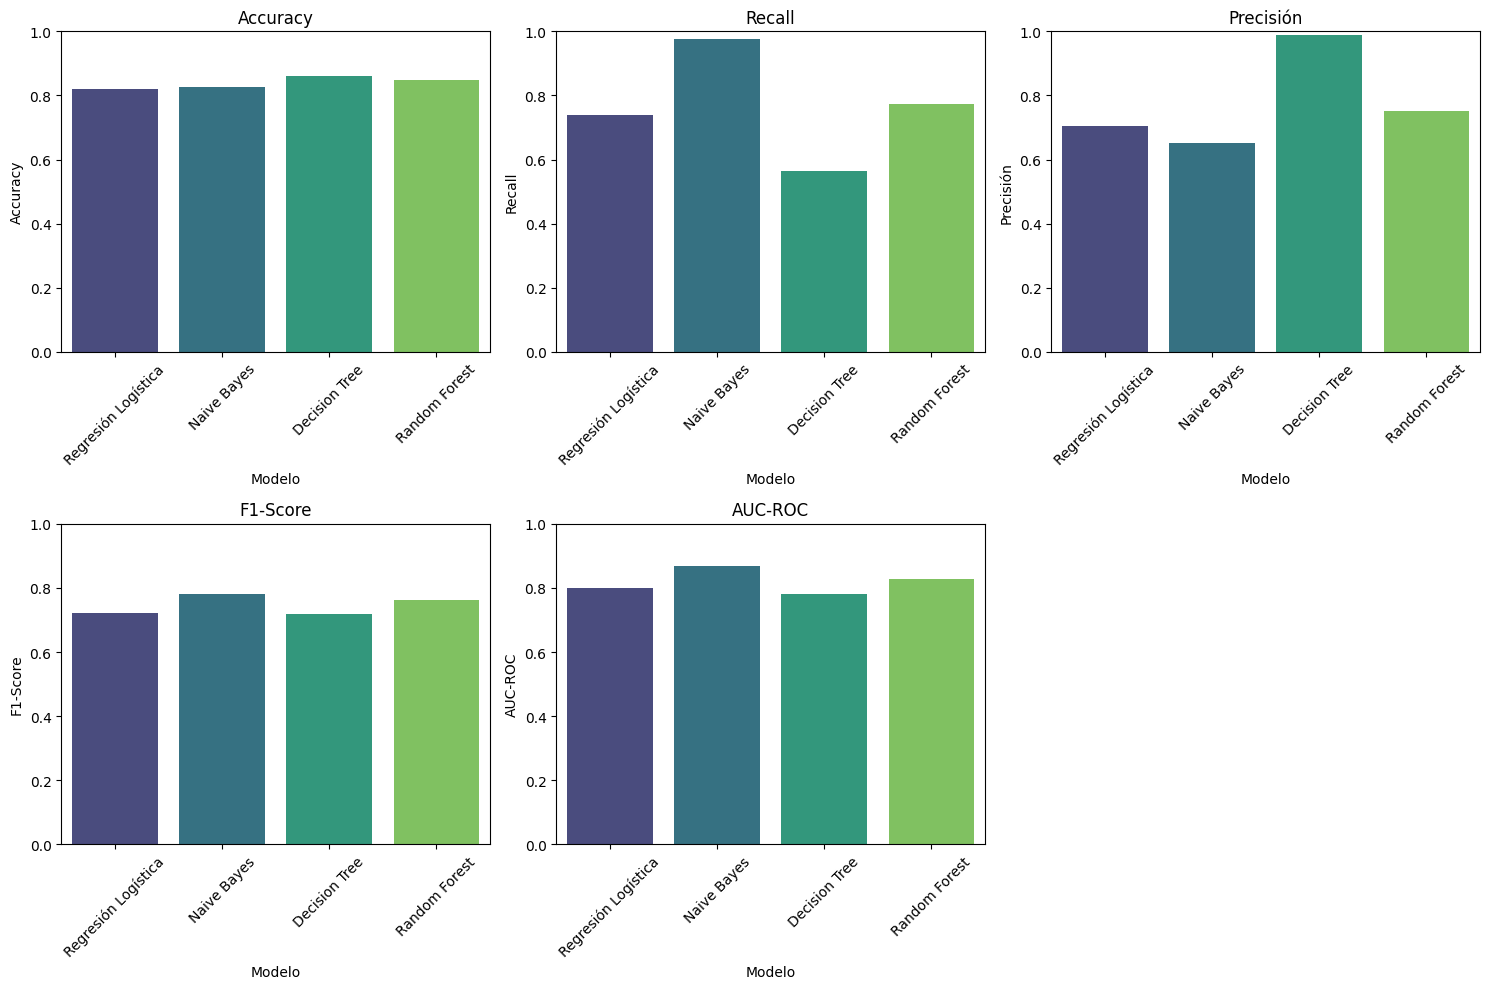

In [132]:
# Escriba su código acá


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de métricas (usando las variables definidas previamente)
data = {
    "Modelo": ["Regresión Logística", "Naive Bayes", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_nb, accuracy_dtc, accuracy_rfc],
    "Recall": [recall_score_lr, recall_score_nb, recall_score_dtc, recall_score_rfc],
    "Precisión": [precision_score_lr, precision_score_nb, precision_score_dtc, precision_score_rfc],
    "F1-Score": [f1_score_lr, f1_score_nb, f1_score_dtc, f1_score_rfc],
    "AUC-ROC": [roc_auc_lr, roc_auc_nb, roc_auc_dtc, roc_auc_rfc]  # Asume que tienes estas variables
}

df = pd.DataFrame(data)

# Tabla comparativa
print("\n=== Tabla Comparativa de Modelos ===")
print(df.round(4))

# Gráficos
plt.figure(figsize=(15, 10))

# Gráfico de barras para métricas
metrics = ['Accuracy', 'Recall', 'Precisión', 'F1-Score', 'AUC-ROC']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Modelo', y=metric, data=df, palette='viridis')
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()



Naive Bayes:

En este contexto es el modelo muy interesante puesto que:

Tiene el mejor recall (97.45%), ideal para no perder clientes. Sin embargo tiene la precision más baja (65.08%), muchos falsos positivos. Además es el que mejor descriminación tiene, lo cual lo vuelve un modelo fiable a pesar de los posibles sesgos que puedan haber.

Decision Tree:

En este contexto es el modelo muy interesante puesto que:


Tiene la Máxima precisión (98.88%), casi sin falsos positivos. Sin embargo tiene el Recall más bajo (56.42%), pierde muchos clientes reales.

Es muy eficiente prediciendo los reales sin embargo se cae en la sensibilidad (la capacidad de detectar churn positivos reales)


